# Analisando implementações de _kNN_, _Naive Bayes_ e _Árvores de Decisão_ pelo ChatGPT
### Lucas Salbego, Gabriel Moszkowicz

Neste trabalho, queremos instruir o ChatGPT a gerar implementações _do zero_ de três algoritmos de Machine Learning vistos em aula: _kNN_, _Naive Bayes_ e _Árvores de Decisão_. Temos o intuito de analisar a qualidade não só das implementações, mas também dos resultados do ChatGPT ao considerar os nossos prompts.

Estaremos interagindo com o modelo em inglês, e a linguagem escolhida será Python.

## kNN

A princípio, vamos começar com o prompt mais direto e ver como o ChatGPT se comporta:

_Prompt: Implement a kNN Model in Python from scratch_

_..._

_ChatGPT: Sure, here's a basic implementation of the k-Nearest Neighbors (kNN) algorithm in Python from scratch:_

```python
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = []
            for i in range(len(self.X_train)):
                distance = np.sqrt(np.sum(np.square(x - self.X_train[i])))
                distances.append((distance, self.y_train[i]))
            distances.sort(key=lambda x: x[0])
            neighbors = distances[:self.k]
            class_votes = {}
            for neighbor in neighbors:
                if neighbor[1] in class_votes:
                    class_votes[neighbor[1]] += 1
                else:
                    class_votes[neighbor[1]] = 1
            sorted_votes = sorted(class_votes.items(), key=lambda x: x[1], reverse=True)
            predictions.append(sorted_votes[0][0])
        return predictions

# Example usage:
if __name__ == "__main__":
    X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
    y_train = np.array([0, 0, 1, 1])

    knn = KNN(k=3)
    knn.fit(X_train, y_train)

    X_test = np.array([[1, 1], [2, 2]])
    predictions = knn.predict(X_test)
    print("Predictions:", predictions)

```

_ChatGPT: This code defines a KNN class with fit and predict methods. The fit method is used to train the model with training data, and the predict method is used to make predictions on new data points. The distance metric used here is Euclidean distance, and the class label of the majority of the k nearest neighbors is chosen as the prediction._

O código funciona sem muitas alterações, e pode ser executado a seguir:


In [2]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = []
            for i in range(len(self.X_train)):
                distance = np.sqrt(np.sum(np.square(x - self.X_train[i])))
                distances.append((distance, self.y_train[i]))
            distances.sort(key=lambda x: x[0])
            neighbors = distances[:self.k]
            class_votes = {}
            for neighbor in neighbors:
                if neighbor[1] in class_votes:
                    class_votes[neighbor[1]] += 1
                else:
                    class_votes[neighbor[1]] = 1
            sorted_votes = sorted(class_votes.items(), key=lambda x: x[1], reverse=True)
            predictions.append(sorted_votes[0][0])
        return predictions

Pontos a Fracos:
*  Cálculo de distâncias não é otimizado e roda em O(N^2).
*  Apenas a distância euclidiana é disponibilizada.

Pontos Fortes:
*  Código roda.
*  K é parametrizado.

Abaixo o modelo pode ser testado, sinta-se a vontade para alterar os parâmetros de entrada, como os conjuntos de treino e teste.

In [3]:
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([0, 0, 1, 1])
test = int(len(X_train)*0.75)
a_treino = X_train[0: test]
a_teste = X_train[test:]
print(a_treino)
print(a_teste)
knn = KNN(k=3)
knn.fit(X_train, y_train)

X_test = np.array([[1, 1], [5, 6]])
predictions = knn.predict(X_test)
print("Predictions:", predictions)

[[1 2]
 [2 3]
 [3 4]]
[[4 5]]
Predictions: [0, 1]


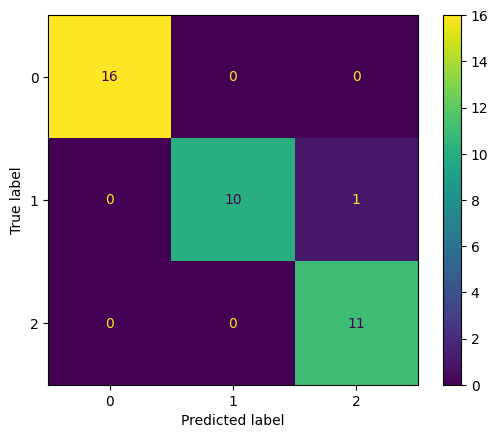

Acuracia: 0.9736842105263158
Recall: [1.         0.90909091 1.        ]


In [34]:
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import random

iris = datasets.load_iris()

def shuffle(a, b, ratio):
    c = list(zip(a, b))
    random.shuffle(c)
    data, target = zip(*c)
    test:int = int(len(iris.data)*ratio)
    X_train = data[0:test]
    X_test = data[test:]
    Y_train = target[0:test]
    Y_test = target[test:]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = shuffle(iris.data, iris.target, 0.75)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])
cm_display.plot()
plt.show()

accuracy = metrics.accuracy_score(Y_test, predictions, normalize= True)
recall = metrics.recall_score(Y_test, predictions, average=None)
print("Acuracia:", accuracy)
print("Recall:", recall)


# for n in range(test):
#     print(n,  " ",  X_train[n],  " ",  Y_train[n])

# print(iris.target)
# for p in range(150 - test):
#     print(p,  " ",  predictions[p],  " ",  Y_test[p])

## Naive Bayes

Prompt: Implement the Naive Bayes algorithm in Python

ChatGPT: This implementation assumes that the input features are binary, but you can adapt it for other types of features or preprocessing steps as needed.
```py
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.prior = None
        self.likelihood = None
        self.classes = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Initialize prior probabilities
        self.prior = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.prior[i] = np.sum(y == c) / float(n_samples)
        
        # Initialize likelihood probabilities
        self.likelihood = np.zeros((n_classes, n_features))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.likelihood[i] = (np.sum(X_c, axis=0) + 1) / (np.sum(X_c) + n_features)
    
    def predict(self, X):
        posteriors = np.zeros((X.shape[0], len(self.classes)))
        for i, c in enumerate(self.classes):
            prior = np.log(self.prior[i])
            likelihood = np.sum(np.log(self.likelihood[i, :]) * X, axis=1)
            posteriors[:, i] = prior + likelihood
        return np.argmax(posteriors, axis=1)

# Example usage:
X_train = np.array([[1, 1, 0], [1, 0, 0], [0, 1, 1], [0, 0, 1]])
y_train = np.array([0, 1, 1, 0])
X_test = np.array([[1, 0, 1], [0, 1, 0]])

nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print("Predictions:", predictions)
```

## Árvore de Decisão